<a href="https://colab.research.google.com/github/niyathimariya/office-supplies/blob/main/P2_OfficeSupplies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
data = pd.read_csv('P2- OfficeSupplies Data.csv')

# Convert OrderDate to datetime

In [3]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%d-%b-%y')

# Convert OrderDate

In [4]:
data['Total Sales'] = data['Units'] * data['Unit Price']

# 1. Sales Analysis

# Total sales for each product category

In [5]:
total_sales_per_category = data.groupby('Item')['Total Sales'].sum().sort_values(ascending=False)
print("Total Sales for Each Product Category:\n", total_sales_per_category)

Total Sales for Each Product Category:
 Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total Sales, dtype: float64


# Product category with the highest sales

In [6]:
highest_sales_category = total_sales_per_category.idxmax()
print("\nProduct Category with the Highest Sales:", highest_sales_category)


Product Category with the Highest Sales: Binder


# Top 10 best-selling products

In [7]:
top_10_best_selling_products = data.groupby('Item')['Units'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:\n", top_10_best_selling_products)


Top 10 Best-Selling Products:
 Item
Binder     722
Pencil     716
Pen Set    395
Pen        278
Desk        10
Name: Units, dtype: int64


# 2. Customer Analysis

# Top 10 customers by sales

In [8]:
top_10_customers_by_sales = data.groupby('Rep')['Total Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales:\n", top_10_customers_by_sales)


Top 10 Customers by Sales:
 Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Total Sales, dtype: float64


# Total number of unique customers

In [9]:
unique_customers = data['Rep'].nunique()
print("\nTotal Number of Unique Customers:", unique_customers)


Total Number of Unique Customers: 11


# Customer purchase frequency (number of purchases per customer)

In [10]:
customer_purchase_frequency = data['Rep'].value_counts()
print("\nCustomer Purchase Frequency:\n", customer_purchase_frequency)


Customer Purchase Frequency:
 Rep
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: count, dtype: int64


# 3. Time Series Analysis

# Monthly sales trends over the past year

In [12]:
data['Month'] = data['OrderDate'].dt.to_period('M')
monthly_sales_trends = data.groupby('Month')['Total Sales'].sum()
print("\nMonthly Sales Trends Over the Past Year:\n", monthly_sales_trends)


Monthly Sales Trends Over the Past Year:
 Month
2014-07    2673.23
2014-08    2005.55
2014-09     666.11
2014-10    1984.57
2014-11     833.78
2014-12    3288.47
2015-01    1602.09
2015-02    2044.33
2015-03     556.87
2015-04    1059.03
2015-05    1300.35
2015-06    1613.50
Freq: M, Name: Total Sales, dtype: float64


# Plot monthly sales trends

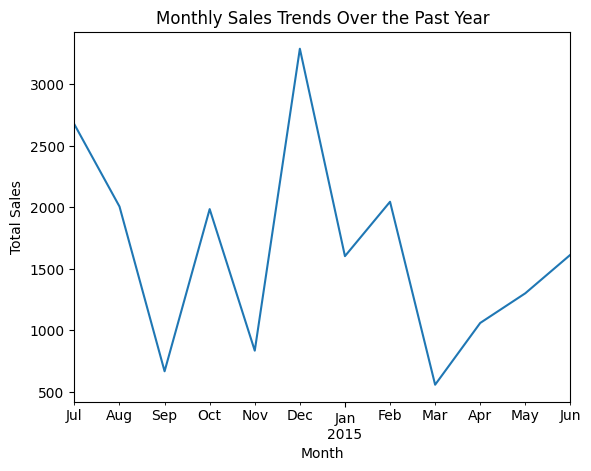

In [13]:
monthly_sales_trends.plot(kind='line', title='Monthly Sales Trends Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

December shows the highest sales. November and January show a significant drop in total sales. The lowest total sales occurred in March

# 4. Geographical Analysis

# Regions generating the most sales

In [14]:
sales_by_region = data.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print("\nRegions Generating the Most Sales:\n", sales_by_region)


Regions Generating the Most Sales:
 Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64


# Plot sales by region

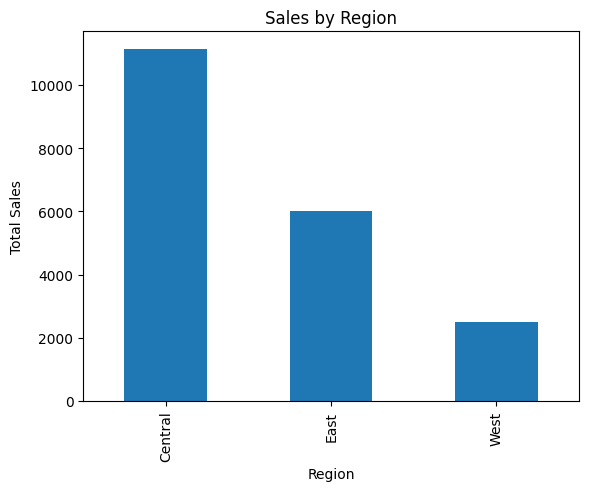

In [15]:
sales_by_region.plot(kind='bar', title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

Sales are highest in Central(11,139.07) followed by East(6,002.09) and West(2,486.72)

# 5. Profit Analysis

# Total profit for each product category

In [16]:
data['Total Profit'] = data['Total Sales'] * 0.20

In [17]:
total_profit_per_category = data.groupby('Item')['Total Profit'].sum().sort_values(ascending=False)
print("\nTotal Profit for Each Product Category:\n", total_profit_per_category)


Total Profit for Each Product Category:
 Item
Binder     1915.530
Pen Set     833.974
Pencil      427.028
Pen         409.044
Desk        340.000
Name: Total Profit, dtype: float64


# Top 10 most profitable products

In [18]:
top_10_most_profitable_products = data.groupby('Item')['Total Profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Profitable Products:\n", top_10_most_profitable_products)


Top 10 Most Profitable Products:
 Item
Binder     1915.530
Pen Set     833.974
Pencil      427.028
Pen         409.044
Desk        340.000
Name: Total Profit, dtype: float64


# Plot top 10 most profitable products

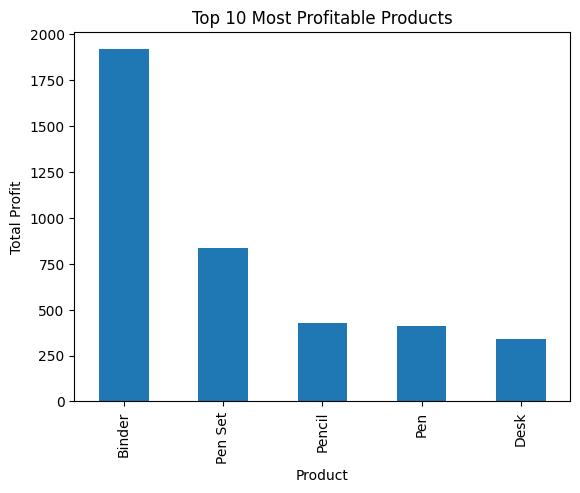

In [19]:
top_10_most_profitable_products.plot(kind='bar', title='Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.show()

Sales of Binder turns out to be more profitable, followed by Pen Set and then Pencil